In [1]:
# Importing pandas library
import pandas as pd
import numpy as np
# Importing the csv data files 
data = pd.read_excel('default_of_credit_card_clients.xls',error_bad_lines=False, warn_bad_lines=True)

# Preinting some information about the dataset
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
data = data.drop(['ID'], axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [3]:
# Function which counts the number of null values for each column
def count_null_values(dataset, column_list):
    for i in range (len(column_list)):
        print ("The total number of null values in :",column_list[i])
        print (dataset[column_list[i]].isnull().sum())
    return

def print_uniques(dataset, column_list):
    for i in range (len(column_list)):
        print ("Unique values for the column:",column_list[i])
        print (dataset[column_list[i]].unique())
        print ('\n')
    return

# Printing the null and unique values for each attribute in the dataset
print_uniques(data, data.columns)
count_null_values(data, data.columns)

Unique values for the column: LIMIT_BAL
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]


Unique values for the column: SEX
[2 1]


Unique values for the column: EDUCATION
[2 1 3 5 4 6 0]


Unique values for the column: MARRIAGE
[1 2 3 0]


Unique values for the column: AGE
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60

(30000, 23)
(30000,)
Dataset Size Before Feature Selection 
(30000, 23)
Dataset Size After Feature Selection 
(30000, 11)
Relative Feature importance for each of the Features- 
[0.0660266  0.01087483 0.03336243 0.02244404 0.06649011 0.09799276
 0.04527359 0.0407696  0.03010738 0.02800085 0.02661921 0.05066415
 0.04683609 0.04556879 0.04445666 0.04319716 0.04408238 0.04374523
 0.04274274 0.04181139 0.04048429 0.04253422 0.0459155 ]


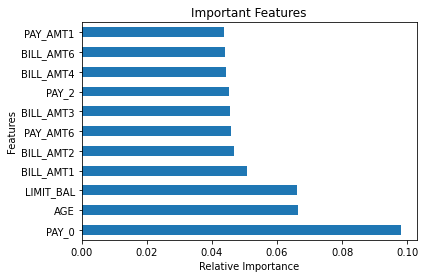

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
#Splitting the variables into features and target
X = data.drop('default payment next month', axis=1)
y = data['default payment next month'].values

print(X.shape)#printing dimensions of features
print(y.shape)#printing dimensions of label

#Printing the variability of all the features
#print(X.var())
#Since the Variability of any column is not very low so selecting all the features based on variability


# Using ExtraTreesClassifier for feature selection
model = ExtraTreesClassifier()
model.fit(X,y)
print ("Dataset Size Before Feature Selection ")
print( X.shape)
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)  
model = SelectFromModel(clf, prefit=True)
X_feat_select = model.transform(X)
print ("Dataset Size After Feature Selection ")
print (X_feat_select.shape )           
print ("Relative Feature importance for each of the Features- ")
print(clf.feature_importances_)

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.title('Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [5]:
print(feat_importances)


LIMIT_BAL    0.066027
SEX          0.010875
EDUCATION    0.033362
MARRIAGE     0.022444
AGE          0.066490
PAY_0        0.097993
PAY_2        0.045274
PAY_3        0.040770
PAY_4        0.030107
PAY_5        0.028001
PAY_6        0.026619
BILL_AMT1    0.050664
BILL_AMT2    0.046836
BILL_AMT3    0.045569
BILL_AMT4    0.044457
BILL_AMT5    0.043197
BILL_AMT6    0.044082
PAY_AMT1     0.043745
PAY_AMT2     0.042743
PAY_AMT3     0.041811
PAY_AMT4     0.040484
PAY_AMT5     0.042534
PAY_AMT6     0.045916
dtype: float64


In [6]:
from sklearn.model_selection import train_test_split
# Training- 70% Testing- 30%
X_train, X_test, y_train, y_test = train_test_split(X_feat_select, y, test_size= 0.3, random_state=42)
print ('Training and testing size')
print (X_train.shape)
print (X_test.shape)

Training and testing size
(21000, 11)
(9000, 11)


In [7]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix
model = RidgeClassifier().fit(X_train, y_train)
print(model.score(X_train, y_train))

model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test)
rec = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
print ('Model Performance Statistic: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Confusion Matrix')
print (confusion_matrix(y_test, y_pred))

0.8000952380952381
Model Performance Statistic: 
Accuracy:  0.7995555555555556
Precision:  0.14591836734693878
Recall:  0.6875
F1 Score:  0.24074074074074076
Confusion Matrix
[[6910  130]
 [1674  286]]


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
# RandomForestRegressor model with hyper tuning
# Parameter for performing hyper tuning
parameters = {'n_estimators': [ 8, 10, 12], 'max_depth': [20, 25, 30], \
              'min_samples_split': [30, 35, 40], 'max_leaf_nodes': [15, 20]}

random_forest_classifier = GridSearchCV(random_forest, parameters,  cv = 5)
random_forest_classifier.fit(X_train, y_train)
print(random_forest_classifier.best_params_)
print(random_forest_classifier.best_score_)

{'max_depth': 20, 'max_leaf_nodes': 20, 'min_samples_split': 30, 'n_estimators': 10}
0.8197619047619048


In [9]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# Testing the model
classifier = RandomForestClassifier(random_state=42, max_depth= 25, max_leaf_nodes= 15,\
                                       min_samples_split= 35, n_estimators= 10)
classifier.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)

# Getting the accuracy metric
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test)
rec = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
print ('Classifier Model Performance Statistic: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Confusion Matrix')
print (confusion_matrix(y_test, y_pred))

Classifier Model Performance Statistic: 
Accuracy:  0.8197777777777778
Precision:  0.33622448979591835
Recall:  0.6724489795918367
F1 Score:  0.4482993197278911
Confusion Matrix
[[6719  321]
 [1301  659]]


In [10]:
# Writing the model to a pickle file
import pickle
with open("default_credit_model.pkl", "wb") as f:
    pickle.dump(classifier,f)
f.close()